In [1]:
# Necessary imports for this notebook
import os

import numpy as np
import pandas as pd

import datetime
import time

import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


➡️**the max value of time 172792.000000 -> 47.99hours -> There are 284,807 transacntions in two days**

In [5]:
df.shape

(284807, 31)

In [6]:
#check missing data
df.isnull().sum().to_frame().transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


C:\tools\Anaconda3\envs\creditcard2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

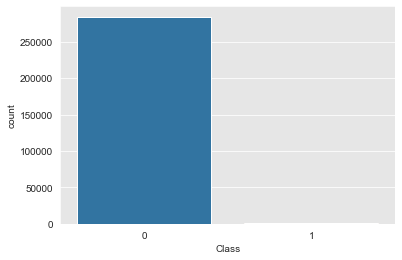

In [7]:
sns.countplot(df.Class)

In [8]:
fraud = df[df["Class"]==1]
len(fraud)

492

# EDA

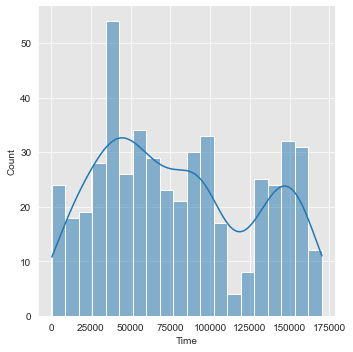

In [9]:
sns.displot(data = df[df["Class"]==1], x ="Time", kde=True, bins=20)

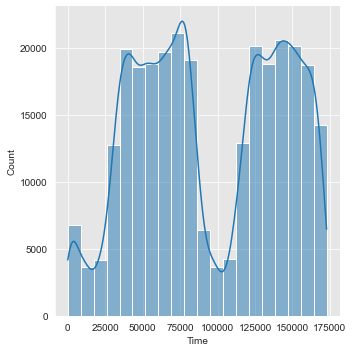

In [10]:
sns.displot(data = df[df["Class"]==0], x ="Time", kde=True, bins =20)

### Hourly Comparison

In [11]:
df["hour"] = df["Time"].apply(lambda x : np.floor(x / 3600))
tmp = df.groupby(["hour","Class"])["Amount"].agg(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_hour = pd.DataFrame(tmp)
df_hour.rename(columns={'count':'transaction'}, inplace=True)
df_hour.head()

,hour,Class,min,max,transaction,sum,mean,median,var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


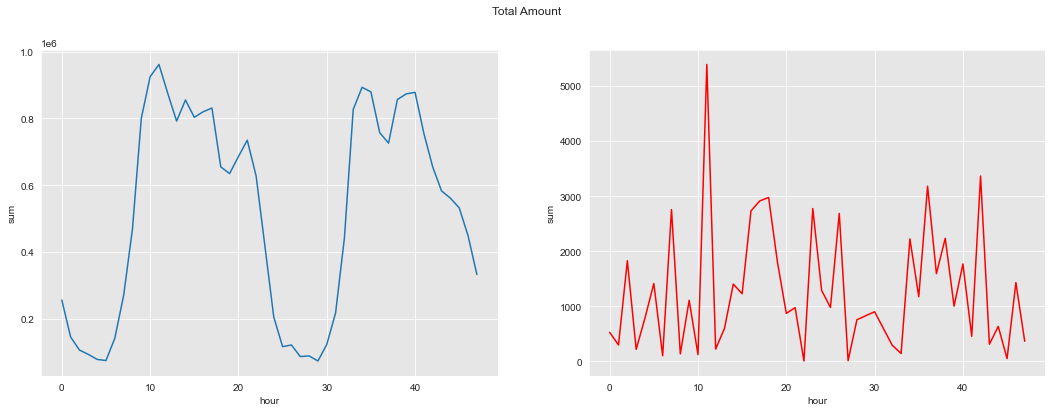

In [12]:
#transaction amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="sum", data=df_hour.loc[df_hour.Class==0])
s = sns.lineplot(ax = ax2, x="hour", y="sum", data=df_hour.loc[df_hour.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

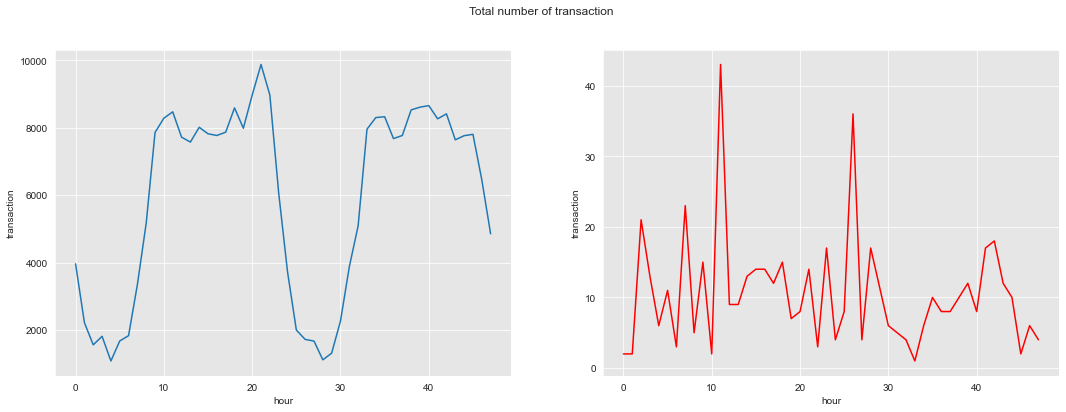

In [13]:
#the number of transaction
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="transaction", data=df_hour.loc[df_hour.Class==0])
s = sns.lineplot(ax = ax2, x="hour", y="transaction", data=df_hour.loc[df_hour.Class==1], color="red")
plt.suptitle("Total number of transaction")
plt.show();

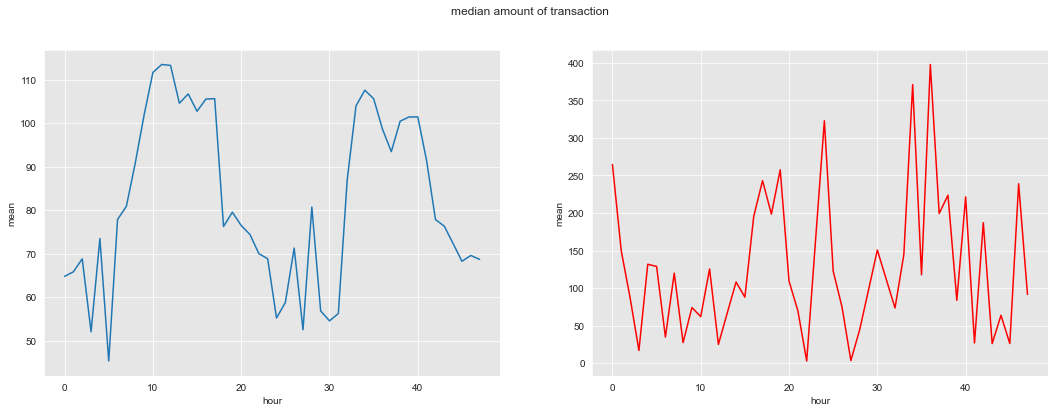

In [14]:
#median amount of transaction
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="mean", data=df_hour.loc[df_hour.Class==0])
s = sns.lineplot(ax = ax2, x="hour", y="mean", data=df_hour.loc[df_hour.Class==1], color="red")
plt.suptitle("median amount of transaction")
plt.show();

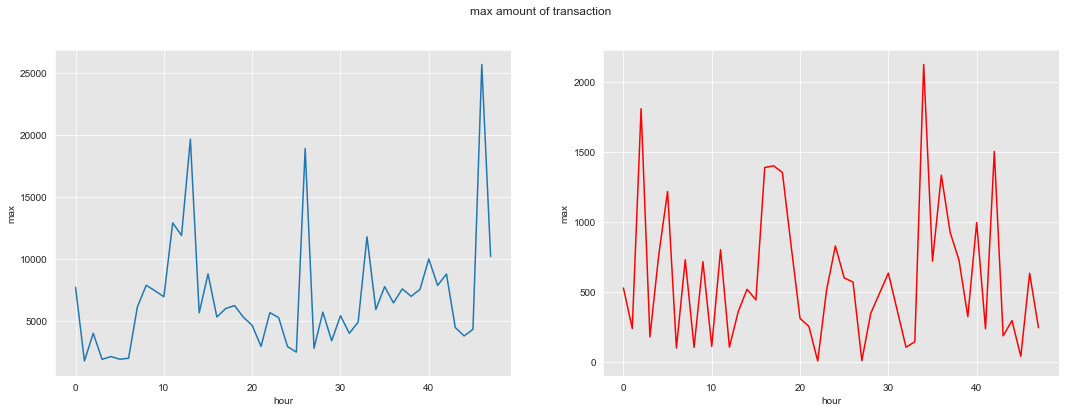

In [15]:
#max amount of transaction
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="max", data=df_hour.loc[df_hour.Class==0])
s = sns.lineplot(ax = ax2, x="hour", y="max", data=df_hour.loc[df_hour.Class==1], color="red")
plt.suptitle("max amount of transaction")
plt.show();

<AxesSubplot:xlabel='Class', ylabel='Amount'>

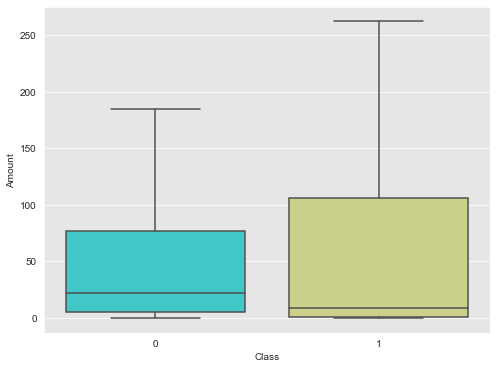

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Class", y = "Amount", data=df, palette="rainbow",showfliers=False) #showflier : suppress the plotting of outliers

### feature correlation

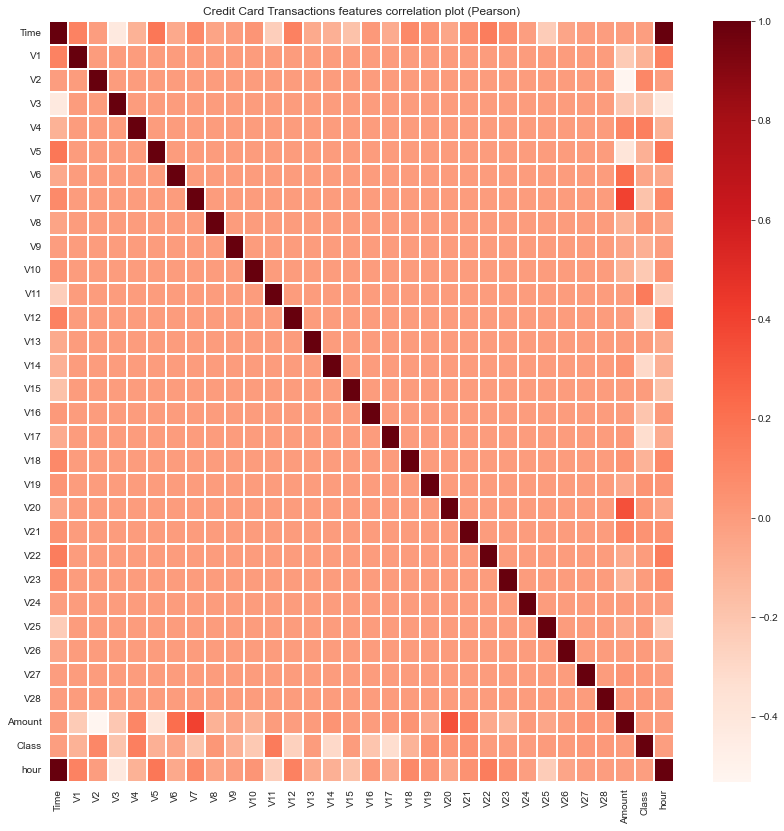

In [17]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

- (Time,V3),(Time,V25) negative correlation
- (Amount, V20), (Amount, V7) positive correlation
- There is no significant correlation in PCA components.

C:\tools\Anaconda3\envs\creditcard2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\envs\creditcard2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\envs\creditcard2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\envs\creditcard2\lib\site-packages\seaborn\distributions.py:169

<Figure size 432x288 with 0 Axes>

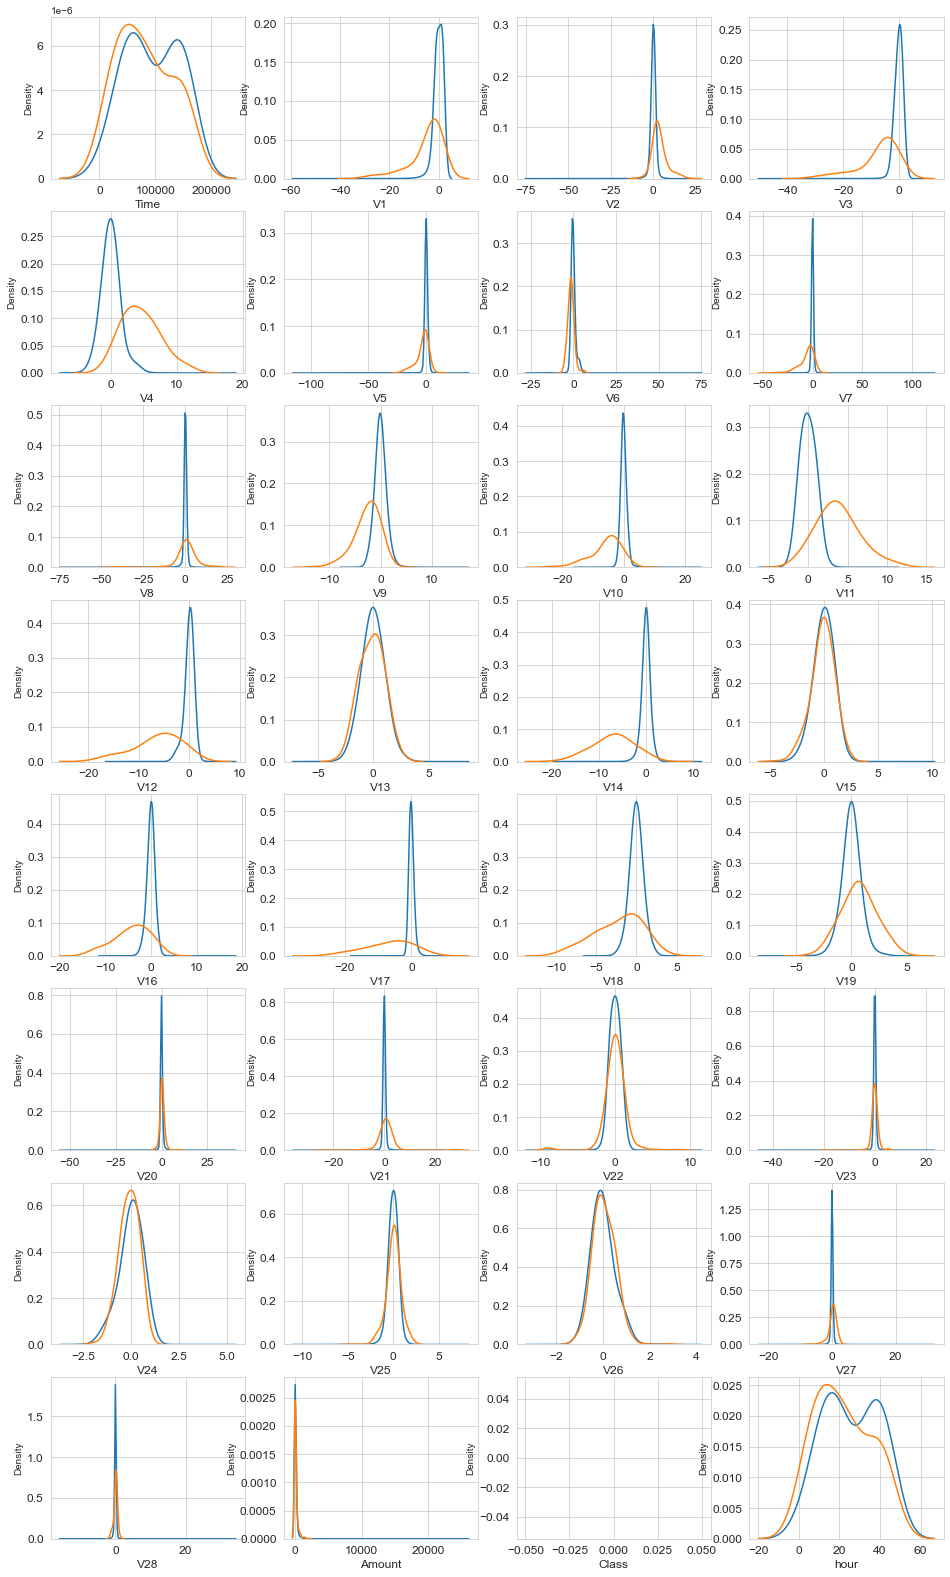

In [18]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

- V4, V11,and V14 show seperate distributions.
- Fraud data can be viewed as skewness distribution, but general transaction data is distributed based on zero.

# Let's GO!!

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,  average_precision_score, roc_curve, auc

import xgboost as xgb
import lightgbm as lgb


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [20]:
X = df.drop(['Class','hour'],axis=1)
y = df["Class"]

In [21]:
from sklearn.preprocessing import StandardScaler
features_to_scale = X.columns
scaled_X = StandardScaler(copy=True)
X.loc[:,features_to_scale] = scaled_X.fit_transform(X[features_to_scale])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42,stratify = y)#데이터 구성비율에 맞게 split

In [22]:
cv = StratifiedKFold(10, shuffle=True, random_state=14)

## 🚀Unsupervised Learning : PCA
- reconstruction error can be used to fraud detection
- If reconstruction error is large, it may be fraud transaction. 
- If the value of n_components is small, it is difficult to reconstruct due to the large loss of information. If the value of n_coponents is big, reconstruction errors are minimized.
- https://www.oreilly.com/library/view/hands-on-unsupervised-learning/9781492035633/ch04.html

In [23]:
def anomaly_scores(original_df, reduced_df):
    loss = np.sum((np.array(original_df)-np.array(reduced_df))**2, axis=1) #재구성했을 때의 위치와 원샘플 위치의 거리
    loss = pd.Series(data=loss,index=original_df.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss)) #normalization
    return loss

In [24]:
def scatter_plot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label",data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

In [25]:
def plot_results(trueLabels, anomalyScores, returnPreds = False): 
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr) #두분포의 분리정도인 auroc로 평가

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

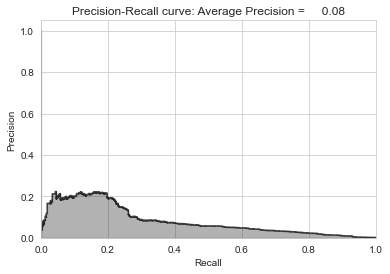

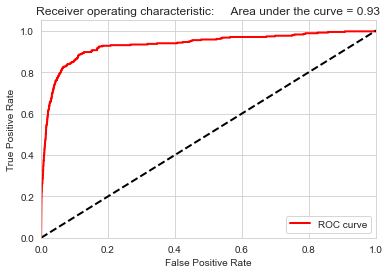

In [26]:
# 30 principal components
from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 42

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse,index=X_train.index)

anomalyScoresPCA = anomaly_scores(X_train, X_train_PCA_inverse)
preds = plot_results(y_train, anomalyScoresPCA, True)

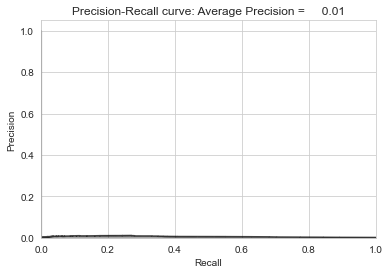

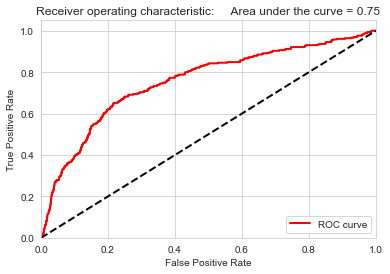

In [27]:
# 27 principal components
from sklearn.decomposition import PCA

n_components = 27
whiten = False
random_state = 42

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse,index=X_train.index)

anomalyScoresPCA = anomaly_scores(X_train, X_train_PCA_inverse)
preds = plot_results(y_train, anomalyScoresPCA, True)

In [28]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 330 #trainset에서 330개의 minority 데이터 샘플
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))

Precision:  0.0
Recall:  0.0


In [29]:
len(X_train)

190820

In [30]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))

Precision:  0.0
Recall:  0.0


In [31]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

cum_sum = np.cumsum(pca.explained_variance_ratio_)*100
comp= [n for n in range(len(cum_sum))]

In [32]:
d = np.argmax(cum_sum >= 95)+1
d

27

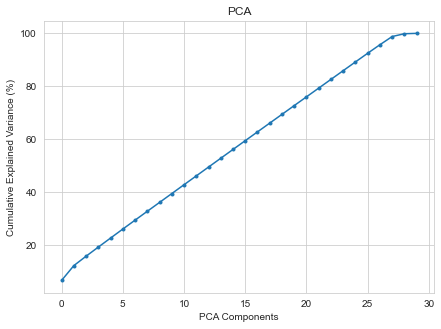

In [33]:
plt.figure(figsize=(7,5))
plt.plot(comp, cum_sum, marker='.')
plt.xlabel('PCA Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA')
plt.show()

➡️ Loss of information increases from 27 or less.

## Supervised Learning

###  1. Imbalanced Data

In [34]:
from imblearn.over_sampling import *
from imblearn.combine import *

In [35]:
#over sampling : SMOTE
X_samp_smote, y_samp_smote = SMOTE(random_state=4).fit_resample(X_train, y_train)
m_lgb = lgb.LGBMClassifier(num_iterations=200, learning_rate=0.01, max_depth=5, random_state=42)
cv_results = cross_validate(m_lgb,X_samp_smote, y_samp_smote,cv=cv, return_train_score=True,scoring=['precision','recall'],verbose=1,n_jobs=-1)
cv_results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.1s finished


{'fit_time': array([19.84233165, 19.81674266, 19.6671145 , 19.84844851, 19.66166115,
        18.15170097, 19.80967617, 18.26365948, 19.67619252, 19.67176986]),
 'score_time': array([0.62052798, 0.64463019, 0.56536031, 0.5899775 , 0.58911371,
        0.54376936, 0.6484735 , 0.58469582, 0.59344029, 0.56837869]),
 'test_precision': array([0.98817204, 0.98945386, 0.98791492, 0.98870178, 0.98939606,
        0.98945045, 0.98772381, 0.98886139, 0.98974607, 0.98829153]),
 'train_precision': array([0.9890835 , 0.98903331, 0.98902352, 0.98912953, 0.98900521,
        0.98911134, 0.98889492, 0.98917062, 0.98900201, 0.98897869]),
 'test_recall': array([0.96488005, 0.96535251, 0.9655625 , 0.96472256, 0.96493254,
        0.96503753, 0.96724237, 0.96472256, 0.96781983, 0.96598247]),
 'train_recall': array([0.96607579, 0.96581331, 0.96651909, 0.96596497, 0.96594164,
        0.96539334, 0.96662992, 0.96594164, 0.96670575, 0.96568499])}

In [36]:
result = pd.DataFrame(cv_results)
result.mean(axis=0)

fit_time           19.440930
score_time          0.594837
test_precision      0.988771
train_precision     0.989043
test_recall         0.965625
train_recall        0.966067
dtype: float64

In [37]:
#over+under sampling : SMOTE + ENN
X_samp_smoteenn, y_samp_smoteenn = SMOTEENN(random_state=0).fit_resample(X_train, y_train)

cv_results = cross_validate(m_lgb,X_samp_smoteenn, y_samp_smoteenn,cv=cv, return_train_score=True,scoring=['precision','recall'],verbose=1,n_jobs=-1)
result = pd.DataFrame(cv_results)
result.mean(axis=0)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.2s finished


fit_time           17.452286
score_time          0.606985
test_precision      0.989128
train_precision     0.989397
test_recall         0.966129
train_recall        0.966204
dtype: float64

In [38]:
result = pd.DataFrame(cv_results)
result.mean(axis=0)

fit_time           17.452286
score_time          0.606985
test_precision      0.989128
train_precision     0.989397
test_recall         0.966129
train_recall        0.966204
dtype: float64

In [39]:
#over+under sampling : SMOTE + Tomek
X_samp_smotetomek, y_samp_smotetomek = SMOTETomek(random_state=4).fit_resample(X_train, y_train)

cv_results = cross_validate(m_lgb,X_samp_smotetomek, y_samp_smotetomek,cv=cv, return_train_score=True,scoring=['precision','recall'],verbose=1,n_jobs=-1)
cv_results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.2s finished


{'fit_time': array([15.75942922, 16.04942822, 16.02143025, 16.20842791, 16.01942778,
        15.98642898, 15.33643007, 15.86742949, 16.05515862, 15.27277613]),
 'score_time': array([0.59799743, 0.60199857, 0.57399678, 0.61358213, 0.65900087,
        0.61600018, 0.52799654, 0.6329999 , 0.59958124, 0.54999948]),
 'test_precision': array([0.98817204, 0.98945386, 0.98791492, 0.98870178, 0.98939606,
        0.98945045, 0.98772381, 0.98886139, 0.98974607, 0.98829153]),
 'train_precision': array([0.9890835 , 0.98903331, 0.98902352, 0.98912953, 0.98900521,
        0.98911134, 0.98889492, 0.98917062, 0.98900201, 0.98897869]),
 'test_recall': array([0.96488005, 0.96535251, 0.9655625 , 0.96472256, 0.96493254,
        0.96503753, 0.96724237, 0.96472256, 0.96781983, 0.96598247]),
 'train_recall': array([0.96607579, 0.96581331, 0.96651909, 0.96596497, 0.96594164,
        0.96539334, 0.96662992, 0.96594164, 0.96670575, 0.96568499])}

In [40]:
result = pd.DataFrame(cv_results)
result.mean(axis=0)

fit_time           15.857637
score_time          0.597315
test_precision      0.988771
train_precision     0.989043
test_recall         0.965625
train_recall        0.966067
dtype: float64

🎯smote+enn방법론으로 낙찰

### 2. modeling

In [41]:
def estimates(X_data, y_data,models, cv):
    train_p_dict = dict()
    test_p_dict = dict()
    time_dict = dict()
    
    train_r_dict = dict()
    test_r_dict = dict()
    
    for model in models:
        current_model_name = model.__class__.__name__
        cv_results = cross_validate(model, X_data,y_data,cv=cv, return_train_score=True,scoring=['precision','recall'],verbose=1,n_jobs=-1)
        
        train_p_dict[current_model_name] = cv_results['train_precision'].mean()
        test_p_dict[current_model_name] = cv_results['test_precision'].mean()
        time_dict[current_model_name] = cv_results['fit_time'].mean()
        
        train_r_dict[current_model_name] = cv_results['train_recall'].mean()
        test_r_dict[current_model_name] = cv_results['test_recall'].mean()
        
    return train_p_dict, test_p_dict, time_dict, train_r_dict, test_r_dict

In [42]:
m_lr = LogisticRegression(solver="liblinear")

m_rfc = RandomForestClassifier(criterion='gini', n_estimators=200,
                            max_depth=5, random_state=42)

m_lgb = lgb.LGBMClassifier(num_iterations=200, learning_rate=0.01,
                        max_depth=5, random_state=42)

m_xgb = xgb.XGBClassifier(n_estimators=200,max_depth=5, random_state=14)

m_mlpc = MLPClassifier(random_state=42)

m_svc = SVC(probability=True)

In [43]:
cv = StratifiedKFold(10, shuffle=True, random_state=14)

models = [m_lr, m_rfc, m_lgb, m_mlpc, m_xgb]

train_p_dict, test_p_dict, time_dict, train_r_dict, test_r_dict = estimates(X_samp_smoteenn, y_samp_smoteenn, models, cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.3min finished


In [44]:
# Training accuracy
train_score= pd.DataFrame(list(train_p_dict.items()),columns=["model","precision"])
train_score["recall"] = train_r_dict.values()

train_score["time"] = time_dict.values()

train_score

,model,precision,recall,time
0,LogisticRegression,0.975835,0.942484,12.220181
1,RandomForestClassifier,0.996070,0.903164,213.641176
2,LGBMClassifier,0.989397,0.966204,16.397411
3,MLPClassifier,0.999926,1.000000,48.351784
4,XGBClassifier,1.000000,1.000000,374.931958


In [45]:
# Test accuracy
# Training accuracy
test_score= pd.DataFrame(list(test_p_dict.items()),columns=["model","precision"])
test_score["recall"] = test_r_dict.values()

test_score

,model,precision,recall
0,LogisticRegression,0.975908,0.942391
1,RandomForestClassifier,0.995982,0.902977
2,LGBMClassifier,0.989128,0.966129
3,MLPClassifier,0.999706,1.000000
4,XGBClassifier,0.999837,1.000000


### 3.grid search

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'max_depth':[4,5,6],     
                'n_estimators' : [200,300,500],
                'gamma': [0.5, 1, 1.5, 2, 5],
}

m_xgb = xgb.XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(m_xgb, parameters,scoring ="precision", cv=cv, return_train_score=True, n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_samp_smoteenn, y_samp_smoteenn)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


C:\tools\Anaconda3\envs\creditcard2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=14, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                             

In [49]:
xgb_grid_search.best_params_

{'gamma': 0.5, 'max_depth': 6, 'n_estimators': 200}

In [50]:
xgb_grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 4. feature importance

In [52]:
importance_features = pd.DataFrame(sorted(zip(xgb_grid_search.best_estimator_.feature_importances_, X.columns)),
                                columns=['Value', 'Feature'])
importance_features = importance_features.sort_values('Value', ascending=False)

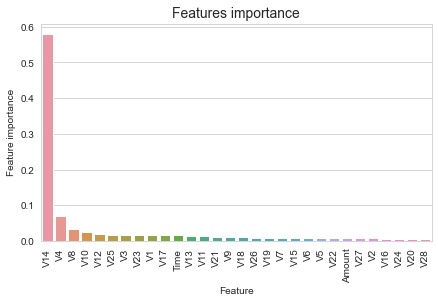

In [53]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': xgb_grid_search.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

# Test

In [54]:
from sklearn.metrics import classification_report

final_model = xgb_grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print(classification_report(y_test,final_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.70      0.83      0.76       162

    accuracy                           1.00     93987
   macro avg       0.85      0.92      0.88     93987
weighted avg       1.00      1.00      1.00     93987

